### 10.1 - a

In [1]:
# Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.
import string

testSentence = "the quick brown fox ! jumped over the lazy dog."

def tokenize(s):
    s = s.translate(str.maketrans('', '', string.punctuation))
    tokens = s.split()
    
    return tokens

In [2]:
#shouldn't include the punctuation -- and it doesn't!
tokenize(testSentence)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

### 10.1 - b

In [3]:
# Implement an `ngram` function that splits tokens into N-grams. 
def ngram(t, n):
    #initializing the list
    ngrams = []
    # using the for loop using number of tokens
    for i in range(len(t) - n + 1):
        ngram = tokens[i:i+n]
        #grab each individual ngram and add it to the list
        ngrams.append(ngram)
    return ngrams

### 10.1 - c

In [4]:
# Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.
def one_hot_encode(t, numWords):
    #initialize blank dictionary, blank list
    token_index = {}
    results = []
    
    # give distinct index for each token
    for t in tokens:
        if t not in token_index:
            token_index[t] = len(token_index) + 1
    
    # Create the one-hot encoded vector
    for t in tokens:
        if t in token_index:
            encoding = [0] * numWords
            token_idx = token_index[t]
            if token_idx <= numWords:
                encoding[token_idx - 1] = 1
            #append to the list we initialized above
            results.append(encoding)
    
    return results

### 10.2

In [5]:
import os
#just making sure where i am
os.getcwd()

'/home/jovyan/dsc650/dsc650/assignments/assignment10'

In [6]:
# Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, 
# train a sequential model with embeddings on the IMDB data found in data/external/imdb/. 
# Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook
import os
import pandas as pd

folderPos = '../../../data/external/imdb/aclImdb/train/pos'
folderNeg = '../../../data/external/imdb/aclImdb/train/neg'

# initializing
data = []
label = []

# positive files
for f in os.listdir(folderPos):
    if f.endswith(".txt"):
        file_path = os.path.join(folderPos, f)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            data.append(content)
            label.append(1) 

# negative files
for f in os.listdir(folderNeg):
    if f.endswith(".txt"):
        file_path = os.path.join(folderNeg, f)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            data.append(content)
            label.append(0)
            
# creating a dataframe
dfTrain = pd.DataFrame({'text': data, 'label': label})

dfTrain.head()

,text,label
0,The acting in this movie was superb. As an ama...,1
1,"Unfortunately, this film has long been unavail...",1
2,It's been quite some time since I've watched t...,1
3,"Okay, so the plot is on shaky ground. Yeah, al...",1
4,A much undervalued film that tells the story o...,1


In [7]:
# now for testing data
folderPos = '../../../data/external/imdb/aclImdb/test/pos'
folderNeg = '../../../data/external/imdb/aclImdb/test/neg'

# initializing
data = []
label = []

# pos files
for f in os.listdir(folderPos):
    if f.endswith(".txt"):
        file_path = os.path.join(folderPos, f)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            data.append(content)
            label.append(1) 

# neg files
for f in os.listdir(folderNeg):
    if f.endswith(".txt"):
        file_path = os.path.join(folderNeg, f)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            data.append(content)
            label.append(0)
            
# making a df
dfTest = pd.DataFrame({'text': data, 'label': label})

dfTest.head()

,text,label
0,After waiting years for a definitive collectio...,1
1,Beauty in Trouble (Kráska v nesnázích) is not ...,1
2,This show is up there with the best Comedys ma...,1
3,"It's just one of those films, you're either lo...",1
4,If you like shoot em up westerns this is a kee...,1


In [8]:
#importing the necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

2023-08-04 15:58:49.807632: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 15:58:49.936112: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 15:58:49.937416: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 15:58:51.116366: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
# tokenizing data on training df
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dfTrain['text'])
sequences = tokenizer.texts_to_sequences(dfTrain['text'])

# pad sequences
maxLength = max(len(s) for s in sequences)
padSeq = pad_sequences(sequences, maxlen=maxLength)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    padSeq, dfTrain['label'], test_size=0.2, random_state=42
)

# Create the sequential model -- using previous week 
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=maxLength))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#5 epochs to save time
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
625/625 [==============================] - 28s 42ms/step - loss: 0.6939 - accuracy: 0.4929 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 2/5
625/625 [==============================] - 24s 38ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 3/5
625/625 [==============================] - 22s 36ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 4/5
625/625 [==============================] - 22s 35ms/step - loss: 0.6932 - accuracy: 0.4943 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 5/5
625/625 [==============================] - 22s 36ms/step - loss: 0.6931 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4970


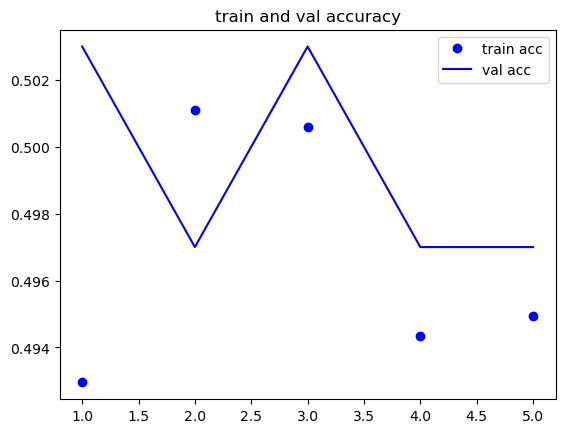

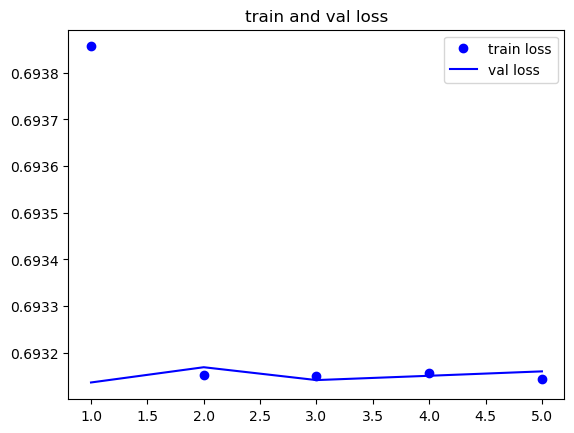

In [10]:
import matplotlib.pyplot as plt

# making the graphs of the curves - had some help from a former assignment on this
# perhaps would have been good to use more epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs, val_acc, 'b', label='val acc')
plt.title('train and val accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='val loss')
plt.title('train and val loss')
plt.legend()
plt.show()

### 10.3

In [11]:
#pretty much stealing this exactly from the textbook - had to change to 1 epoch though as it was taking FOREVER
from tensorflow.keras.layers import LSTM

# Create the sequential model with LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=maxLength))
model.add(LSTM(16)) 
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#using more epochs, learned my lesson from the graph above
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=32)

2023-08-04 16:01:08.763274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-04 16:01:08.765686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-04 16:01:08.767307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - ETA: 0s - loss: 0.4415 - accuracy: 0.7964

2023-08-04 16:23:29.793107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-04 16:23:29.795490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-04 16:23:29.797430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - 1407s 2s/step - loss: 0.4415 - accuracy: 0.7964 - val_loss: 0.3109 - val_accuracy: 0.8764


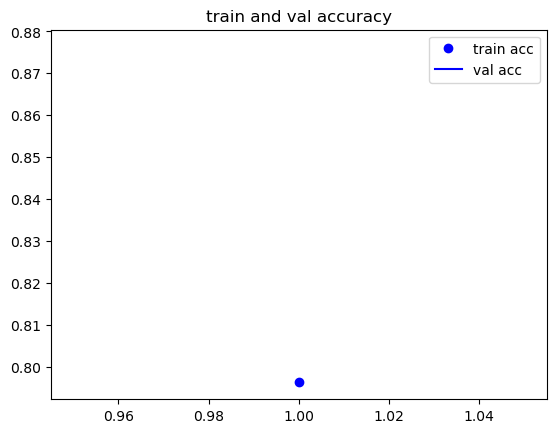

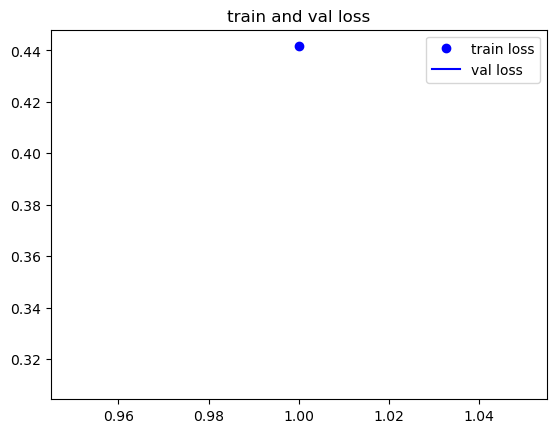

In [12]:
import matplotlib.pyplot as plt

# Creating training and validation loss and accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs, val_acc, 'b', label='val acc')
plt.title('train and val accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='val loss')
plt.title('train and val loss')
plt.legend()
plt.show()

### 10.4

In [15]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

# had to use just 5 epochs due to time it takes to process
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=maxLength))
model.add(Conv1D(16, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
625/625 [==============================] - 27s 41ms/step - loss: 0.4959 - accuracy: 0.7657 - val_loss: 0.3756 - val_accuracy: 0.8320
Epoch 2/5
625/625 [==============================] - 23s 37ms/step - loss: 0.3004 - accuracy: 0.8758 - val_loss: 0.3145 - val_accuracy: 0.8688
Epoch 3/5
625/625 [==============================] - 24s 38ms/step - loss: 0.1953 - accuracy: 0.9294 - val_loss: 0.3054 - val_accuracy: 0.8734
Epoch 4/5
625/625 [==============================] - 24s 38ms/step - loss: 0.1158 - accuracy: 0.9655 - val_loss: 0.3078 - val_accuracy: 0.8750
Epoch 5/5
625/625 [==============================] - 23s 37ms/step - loss: 0.0630 - accuracy: 0.9859 - val_loss: 0.3326 - val_accuracy: 0.8732


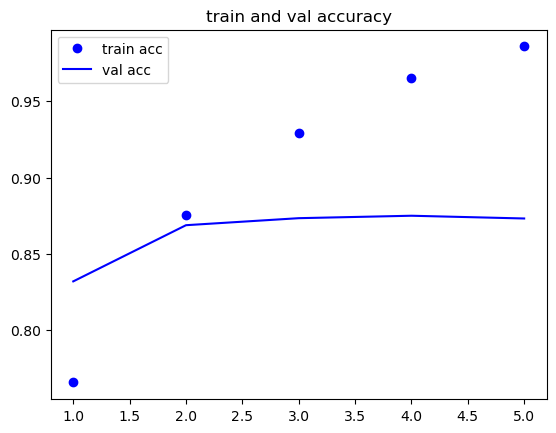

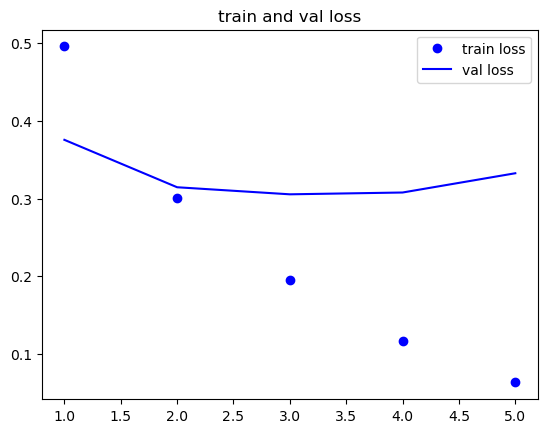

In [16]:
# making the curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs, val_acc, 'b', label='val acc')
plt.title('train and val accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='val loss')
plt.title('train and val loss')
plt.legend()
plt.show()